In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on='Mouse ID', how='outer')

# reorganize the table
mouse_clinical_df = mouse_clinical_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug' ]]

# Display the data table for preview
mouse_clinical_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# pull the categories needed
tumor_df = mouse_clinical_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Convert to DataFrame & reset index
# group by Drug and Timepoint, calculate the mean, and reset the index
tumor_avg_df = tumor_df.groupby(['Drug', 'Timepoint']).mean().reset_index()

# rename 
tumor_avg_df = tumor_avg_df.rename(columns={'Tumor Volume (mm3)':'Avg. Tumor Volume'})

# Preview DataFrame
tumor_avg_df.head()



,Drug,Timepoint,Avg. Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
from scipy.stats import sem, ttest_ind
tumor_std_df = tumor_df.groupby(['Drug', 'Timepoint']).sem().reset_index()

# Convert to DataFrame
# rename column
tumor_std_df = tumor_std_df.rename(columns={'Tumor Volume (mm3)':'STD Tumor Volume'})


# Preview DataFrame
tumor_std_df.head()

,Drug,Timepoint,STD Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
# set Timepoint as index
tumor_mung_df = tumor_avg_df.set_index(['Timepoint'])

# create a pivot table for the data
tumor_mung = pd.pivot_table(tumor_mung_df, values = 'Avg. Tumor Volume', index= 'Timepoint', columns = ['Drug'] )

# Preview that Reformatting worked
tumor_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


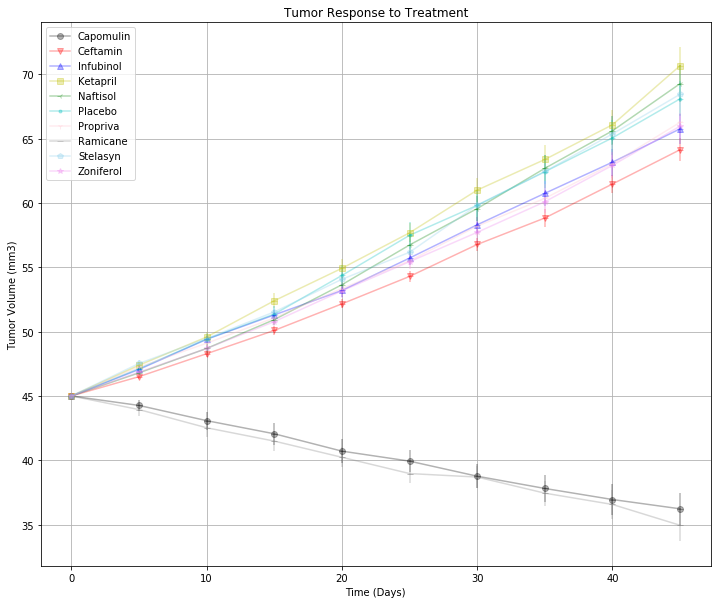

In [88]:
# create list to hold markers
markers = ['o', 'v','^', 's', '3', '.', '1', '_', 'p','*']
colors = ['k', 'r','b', 'y', 'g', 'c', 'pink', 'grey', 'skyblue','violet']

# pull values/set variables
tumor_std_dff = tumor_std_df.set_index('Drug')
tumor_avg_dff = tumor_avg_df.set_index('Drug')
index = 0

# iterate over each column
for i in range(0,10):
    plt.plot(tumor_mung.iloc[:,[i]], marker = markers[index], alpha = 0.3, color=colors[index])
    plt.legend(tumor_mung.columns, loc='4')
    x = pd.DataFrame(tumor_avg_dff.loc[[med[index]],'Timepoint'].values)
    y = pd.DataFrame(tumor_avg_dff.loc[[med[index]],'Avg. Tumor Volume'].values)
    error = pd.DataFrame(tumor_std_dff.loc[[med[index]],'STD Tumor Volume'].values)
    plt.errorbar(x[0], y[0], error[0], fmt="_", alpha=0.3, color=colors[index])
    index += 1
    
# label and format
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid()

# save & show the figure
plt.rcParams["figure.figsize"] = [12,10]
plt.show()


## Metastatic Response to Treatment

In [51]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_df = mouse_clinical_df[["Timepoint", "Metastatic Sites", "Drug"]]

# Convert to DataFrame
meta_mean_df = meta_df.groupby(['Drug', 'Timepoint']).mean().reset_index()

# Rename columns
meta_mean_df = meta_mean_df.rename(columns={"Metastatic Sites": "Meta Mean"})

# Preview DataFrame
meta_mean_df.head()


,Drug,Timepoint,Meta Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [52]:
# Find standard error and convert to DataFrame
meta_std_df = meta_df.groupby(['Drug', 'Timepoint']).sem().reset_index()

# Rename columns
meta_std_df = meta_std_df.rename(columns={"Metastatic Sites": "Meta STD"})

# Preview DataFrame
meta_std_df.head()


,Drug,Timepoint,Meta STD
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [53]:
# Minor Data Munging to Re-Format the Data Frames
meta_mung_df = pd.pivot_table(meta_mean_df, values = 'Meta Mean', index= 'Timepoint', columns = ['Drug'] )

# Preview that Reformatting worked
meta_mung_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


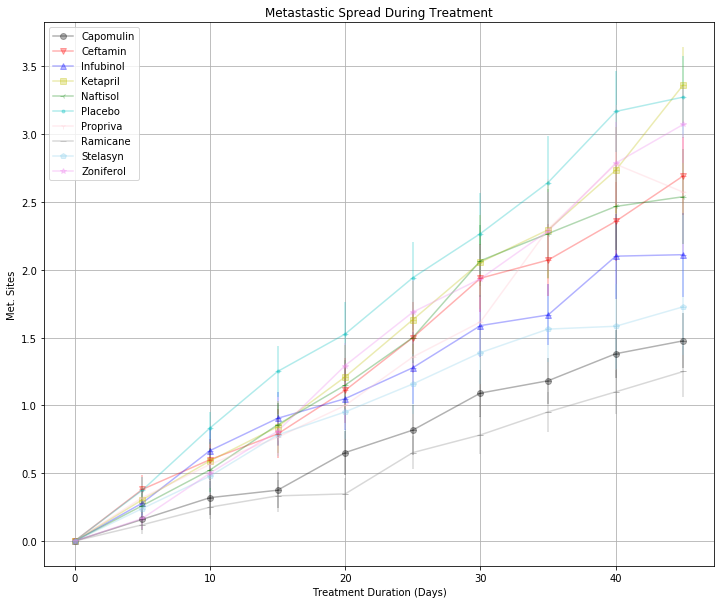

In [135]:
# create list to hold markers
markers = ['o', 'v','^', 's', '3', '.', '1', '_', 'p','*']
colors = ['k', 'r','b', 'y', 'g', 'c', 'pink', 'grey', 'skyblue','violet']

# pull values/set variables
meta_std_dff = meta_std_df.set_index('Drug')
meta_avg_dff = meta_mean_df.set_index('Drug')
index = 0

# iterate over each column
for i in range(0,10):
    plt.plot(meta_mung_df.iloc[:,[i]], marker = markers[index], alpha = 0.3, color=colors[index])
    plt.legend(meta_mung_df.columns, loc='best')
    x = pd.DataFrame(meta_avg_dff.loc[[med[index]],'Timepoint'].values)
    y = pd.DataFrame(meta_avg_dff.loc[[med[index]],'Meta Mean'].values)
    error = pd.DataFrame(meta_std_dff.loc[[med[index]],'Meta STD'].values)
    plt.errorbar(x[0], y[0], error[0], fmt="_", alpha=0.3, color=colors[index])
    index += 1
    
# label and format
plt.title('Metastastic Spread During Treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid()

# save & show the figure
plt.rcParams["figure.figsize"] = [12,10]
plt.show()


## Survival Rates

In [144]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = mouse_clinical_df[['Timepoint', 'Drug', 'Mouse ID']]
mice_count_df = mice_df.groupby(['Drug', 'Timepoint']).count().reset_index()
mice_count_df = mice_count_df.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [97]:
# Minor Data Munging to Re-Format the Data Frames
mice_mung_df = pd.pivot_table(mice_count_df, values = 'Mouse Count', index= 'Timepoint', columns = ['Drug'] )
# Preview the Data Frame
mice_mung_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [185]:
# Generate the Plot (Accounting for percentages)
# determine starting mice population
mice_start_df = pd.DataFrame(mice_mung_df.loc[0]).rename(columns={0:'Starting Mice'})
mouse_per_df = mice_count_df
n = []
med = []
# calculate percentages
for drug in mouse_per_df['Drug']:
    x = mice_start_df.loc[drug]['Starting Mice']
    n.append(x)
    med.append(drug)
    y = mouse_per_df['Mouse Count']
    mouse_per_df['Mouse Percentage'] = (y/x)*100
z = pd.DataFrame({'drug': med,
                  'start': n,
                  'value': y})

z['Percentage'] = (z['value']/z['start'])*100
mice_count_df['Percentage'] = (z['value']/z['start'])*100
# pivot table percentages
percent_df = pd.pivot_table(mice_count_df, values = 'Percentage', index= 'Timepoint', columns = ['Drug'] )
percent_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


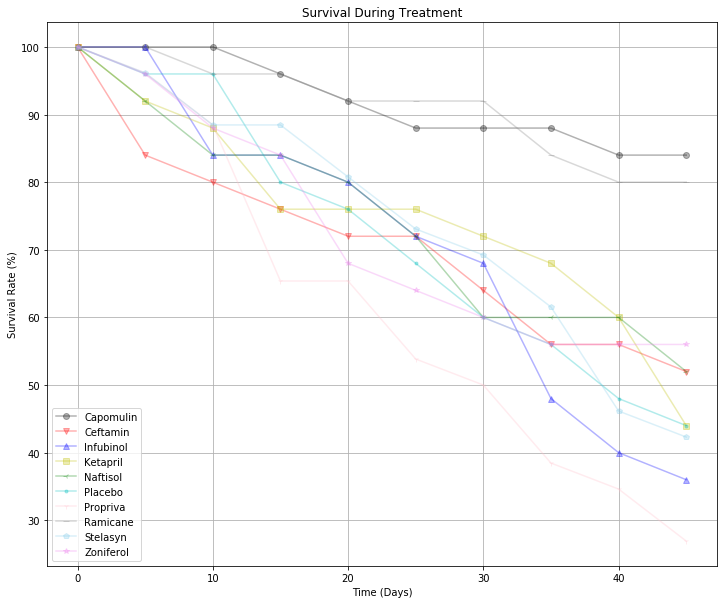

In [186]:
# create list to hold markers
markers = ['o', 'v','^', 's', '3', '.', '1', '_', 'p','*']
colors = ['k', 'r','b', 'y', 'g', 'c', 'pink', 'grey', 'skyblue','violet']

# pull values/set variables
index = 0

# iterate over each column
for i in range(0,10):
    plt.plot(percent_df.iloc[:,[i]], marker = markers[index], alpha = 0.3, color=colors[index])
    plt.legend(percent_df.columns, loc='best')
    index += 1
    
# label and format
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')
plt.grid()

# save & show the figure
plt.rcParams["figure.figsize"] = [12,10]
plt.show()


## Summary Bar Graph

In [199]:
# Calculate the percent changes for each drug
per_change_df = mice_mung_df.pct_change()
per_change_df
# Display the data to confirm


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,-0.160000,0.000000,-0.080000,-0.080000,-0.040000,-0.038462,0.000000,-0.038462,-0.040000
10,0.000000,-0.047619,-0.160000,-0.043478,-0.086957,0.000000,-0.080000,-0.040000,-0.080000,-0.083333
15,-0.040000,-0.050000,0.000000,-0.136364,0.000000,-0.166667,-0.260870,0.000000,0.000000,-0.045455
20,-0.041667,-0.052632,-0.047619,0.000000,-0.047619,-0.050000,0.000000,-0.041667,-0.086957,-0.190476
25,-0.043478,0.000000,-0.100000,0.000000,-0.100000,-0.105263,-0.176471,0.000000,-0.095238,-0.058824
30,0.000000,-0.111111,-0.055556,-0.052632,-0.166667,-0.117647,-0.071429,0.000000,-0.052632,-0.062500
35,0.000000,-0.125000,-0.294118,-0.055556,0.000000,-0.066667,-0.230769,-0.086957,-0.111111,-0.066667
40,-0.045455,0.000000,-0.166667,-0.117647,0.000000,-0.142857,-0.100000,-0.047619,-0.250000,0.000000


In [200]:
drugs_names = per_change_df.columns
change = []
for names in drugs_names:
    change.append(per_change_df[names].sum())

change

[-0.17059947299077727,
 -0.6177903091060988,
 -0.9239589169000934,
 -0.7523427572263217,
 -0.614575569358178,
 -0.7724340262420759,
 -1.1802217163342483,
 -0.21624223602484482,
 -0.7977321788305771,
 -0.5472542653425007]

In [196]:
percent_changes = percent_df.loc[0] - percent_df.loc[45]
percent_changes

Drug
Capomulin    16.000000
Ceftamin     48.000000
Infubinol    64.000000
Ketapril     56.000000
Naftisol     48.000000
Placebo      56.000000
Propriva     73.076923
Ramicane     20.000000
Stelasyn     57.692308
Zoniferol    44.000000
dtype: float64

In [146]:
# Calculate the percent changes for each drug
mice_surv = pd.DataFrame(percent_df.loc[45]).rename(columns={45: 'Ending Per.'})
mice_surv
# Display the data to confirm

,Ending Per.
Drug,
Capomulin,84.0
Ceftamin,52.0
Infubinol,36.0
Ketapril,44.0
Naftisol,52.0
Placebo,44.0
Propriva,28.0
Ramicane,80.0
Stelasyn,44.0


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()